# Case study report by Data Scientist Tendai

1. An organisation would like to offer their employees an allowance to live a healthier lifestyle, and improve the physical health of their employees.
However, the organisation cannot afford to give this allowance to all employees and have requested the data science team to help identify the employees
that will benefit most from this.


2. The data science team conducted research and found a dataset on the internet, that they believe can help them predict if someone 
is at risk for heart disease or not, which they believe will be a good indicator of employees that will benefit from this health-allowance .


    
3. The dataset that they found was collected by asking the following questions to a certain group of people:
    
- `HeartDisease`:	Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- `BMI`:	Body Mass Index (BMI)
- `Smoking`:	Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- `AlcoholDrinking`:	Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`:	(Ever told) (you had) a stroke?
- `PhysicalHealth`:	Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
- `ID`:	Survey question unique identifier
- `MentalHealth`:	Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
- `DiffWalking`:	Do you have serious difficulty walking or climbing stairs?
- `Income`: What is your monthly income/salary?	
- `Sex`:	Are you male or female?
- `AgeCategory`:	Fourteen-level age category
- `Race`:	Imputed race/ethnicity value
- `Diabetic`:	(Ever told) (you had) diabetes?
- `PhysicalActivity`:	Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- `GenHealth`:	Would you say that in general your health is...
- `SleepTime`:	On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma`:	(Ever told) (you had) asthma?
- `KidneyDisease`:	Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer`:	(Ever told) (you had) skin cancer?

## Requirements

Please follow the following steps as indicated in the code
1. Identify the target column and assign to y (1)

2. Identify columns from the data set that you will use as features for the model, please motivate columns that you REMOVE/LEAVE OUT , if any (3)

3. Using your own discretion, apply 2-5 transformations to the dataset so that it can be used for classifier model
    and motivate each transformation in the comments, see first transformation as example (10)
       
4. Create a visualisation that will help you determine if there are correlations between the features you created for this model (3)

5. Create test and training data sets (2)

6. Apply any steps (please explain the steps in the comments) you see fit to improve the initial model's output (15)

7. Evaluate the model's performance using accuracy, precision and recall in predicting a case of HeartDisease. (3)

8. Motivate if the model in its current form will be sufficient for its intended purpose or not. (10)

9. Briefly discuss the issue of overfitting and how to mitigate it (2)


10. Suggest alternative solutions to solve the organisation's problem (1)

# Libaries and dependancies 

In [2]:
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Data Exploration

In [3]:
data = pd.read_csv('case_study.csv')


## Due to limitation in my computation power. I have using 10% of the dataset. These results can be reproduced on a larger dataset 

In [4]:
data=data.sample(frac=0.1)

In [5]:
data.shape

(20212, 20)

In [6]:
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,ID,MentalHealth,DiffWalking,Income,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
128101,No,23.44,No,No,No,0,98818,3,No,40000,Female,25-29,White,No,Yes,Very good,7,Yes,No,No
22725,No,25.85,No,No,No,0,43112,0,No,40000,Female,18-24,Hispanic,No,No,Excellent,8,Yes,No,No
74673,No,30.07,Yes,No,No,0,83424,2,No,20000,Female,55-59,White,Yes,No,Good,4,No,No,No
19910,No,26.63,Yes,No,No,0,44775,0,No,40000,Female,80 or older,White,No,No,Good,6,No,No,No
93206,No,24.96,Yes,No,No,0,53074,15,No,50000,Female,35-39,White,No,Yes,Good,6,No,No,Yes
37726,No,23.63,No,No,No,0,22145,0,No,10000,Male,55-59,White,No,Yes,Very good,7,No,No,No
44622,No,24.96,No,No,No,0,23160,7,No,20000,Female,25-29,White,No,Yes,Very good,8,No,No,No
174100,No,29.05,No,No,No,0,64346,0,No,30000,Female,55-59,White,No,Yes,Good,6,No,No,No
9364,No,18.46,No,No,No,0,38501,10,No,30000,Male,18-24,White,No,Yes,Good,7,No,No,No
93522,Yes,20.98,Yes,No,No,0,50051,10,No,10000,Male,60-64,White,No,Yes,Very good,7,No,No,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20212 entries, 128101 to 175986
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      20212 non-null  object 
 1   BMI               20212 non-null  float64
 2   Smoking           20212 non-null  object 
 3   AlcoholDrinking   20212 non-null  object 
 4   Stroke            20212 non-null  object 
 5   PhysicalHealth    20212 non-null  int64  
 6   ID                20212 non-null  int64  
 7   MentalHealth      20212 non-null  int64  
 8   DiffWalking       20212 non-null  object 
 9   Income            20212 non-null  int64  
 10  Sex               20212 non-null  object 
 11  AgeCategory       20212 non-null  object 
 12  Race              20212 non-null  object 
 13  Diabetic          20212 non-null  object 
 14  PhysicalActivity  20212 non-null  object 
 15  GenHealth         20212 non-null  object 
 16  SleepTime         20212 non-null  

In [8]:
#Checking the completeness of the dataset to see if there is any NaN 
data.replace("?",np.NaN)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,ID,MentalHealth,DiffWalking,Income,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
128101,No,23.44,No,No,No,0,98818,3,No,40000,Female,25-29,White,No,Yes,Very good,7,Yes,No,No
22725,No,25.85,No,No,No,0,43112,0,No,40000,Female,18-24,Hispanic,No,No,Excellent,8,Yes,No,No
74673,No,30.07,Yes,No,No,0,83424,2,No,20000,Female,55-59,White,Yes,No,Good,4,No,No,No
19910,No,26.63,Yes,No,No,0,44775,0,No,40000,Female,80 or older,White,No,No,Good,6,No,No,No
93206,No,24.96,Yes,No,No,0,53074,15,No,50000,Female,35-39,White,No,Yes,Good,6,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32248,No,44.30,No,No,No,2,71415,3,No,10000,Female,45-49,White,No,No,Very good,6,No,No,No
83509,Yes,31.87,Yes,No,Yes,3,31520,0,Yes,40000,Male,80 or older,White,No,No,Excellent,6,No,Yes,No
42068,No,22.15,No,No,No,0,49249,0,No,30000,Male,80 or older,White,No,Yes,Very good,8,No,No,Yes
160427,No,28.80,Yes,No,No,0,10953,0,No,10000,Male,55-59,White,No,Yes,Very good,5,No,No,No


## My target column is Heart Disease

In [9]:

X=data.drop(["HeartDisease"],axis=1)
y=data["HeartDisease"].copy()
print(y)


128101     No
22725      No
74673      No
19910      No
93206      No
         ... 
32248      No
83509     Yes
42068      No
160427     No
175986     No
Name: HeartDisease, Length: 20212, dtype: object


In [10]:
X=pd.DataFrame(X)

## Data Visualization

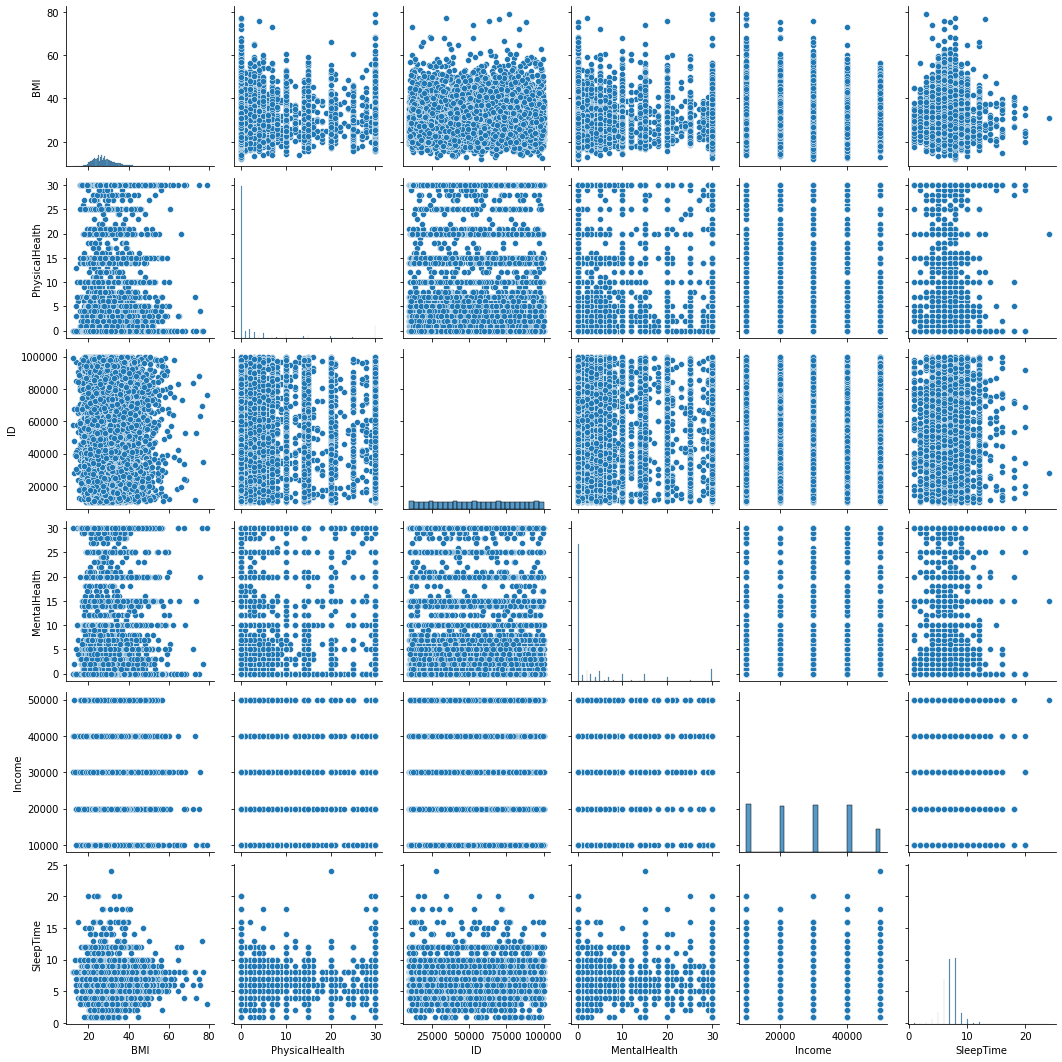

In [11]:
##Plot pairwise relationships in a dataset.
sns.pairplot(X)
plt.show()

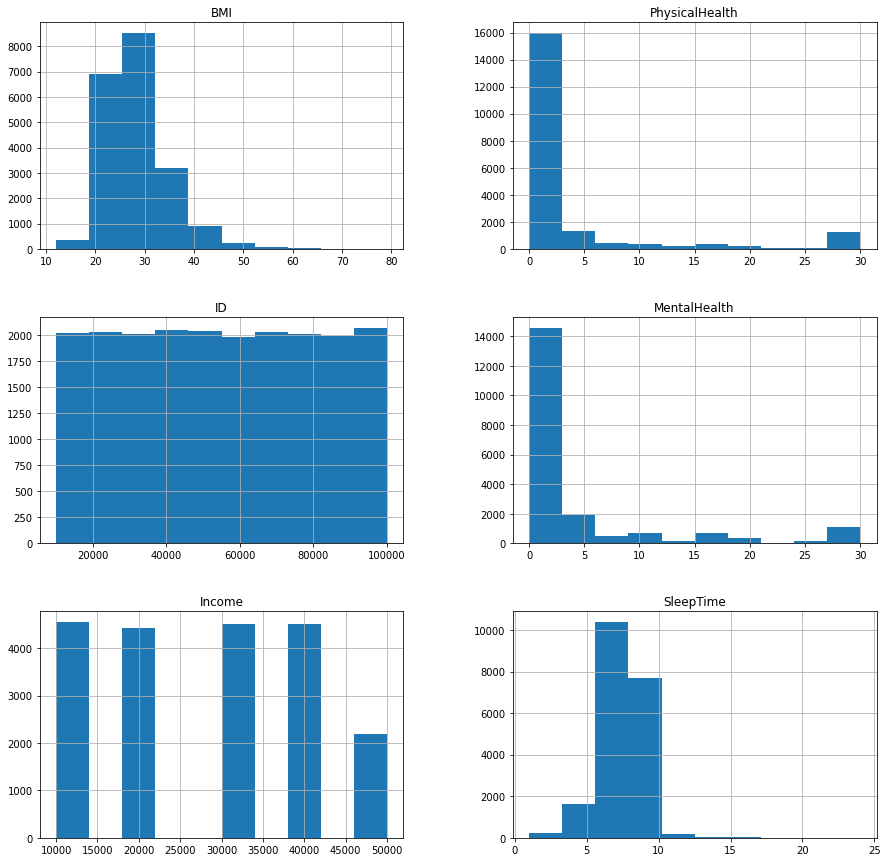

In [12]:
X.hist(figsize=(15,15))
plt.show()

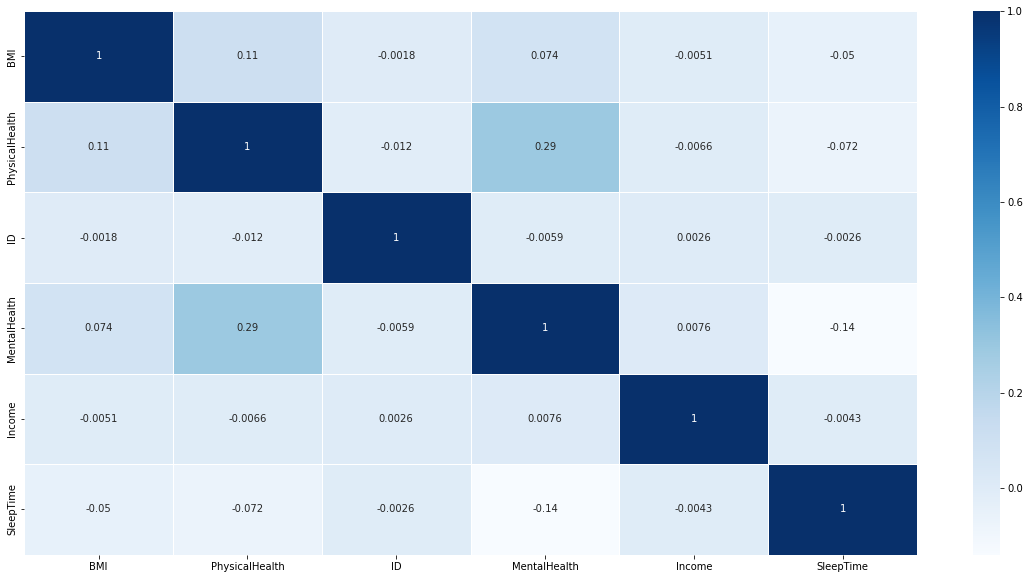

In [13]:
plt.figure(figsize = (20, 10)) 
sns.heatmap(X.corr(), cmap='Blues',annot=True, linecolor='White', linewidths=1.0)
plt.show()

## Dataset Transformation

For my use case,the more infomation l will give to the model and varibales the more accuractly will be able to predict the right outcomes. 

With linear regression, or generalized linear models estimated by maximum likelihood (or least squares), you need to leave out one column. Otherwise you will get a message about some columns "left out because of singularities".

But if you estimate such models with regularization, for example ridge, lasso, then you should not leave out any columns. The regularization takes care of the singularities, and more important, the prediction obtained may depend on which columns you leave out. That will not happen when you do not use regularization.

With other models, use the same principles. If the predictions obtained depends on which columns you leave out, then do not do it. Otherwise it is fine.


### Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

In [14]:
encoder = OneHotEncoder(sparse=False,drop="first")


col = ["AgeCategory","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex"
                          ,"Race","Diabetic","PhysicalActivity","GenHealth","Asthma"
                          ,"KidneyDisease","SkinCancer"]
encode_col = encoder.fit_transform(X[col])

In [15]:
encode_col_name=encoder.get_feature_names(col)

In [16]:
encode_data =pd.DataFrame(encode_col,columns=encode_col_name)

In [17]:
data_new=pd.concat([X.reset_index(drop=True),encode_data.reset_index(drop=True)],axis=1)

In [18]:
data_new.drop(col,axis=1,inplace=True)

In [19]:
data_new

,BMI,PhysicalHealth,ID,MentalHealth,Income,SleepTime,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,23.44,0,98818,3,40000,7,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,25.85,0,43112,0,40000,8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,30.07,0,83424,2,20000,4,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.63,0,44775,0,40000,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,24.96,0,53074,15,50000,6,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20207,44.30,2,71415,3,10000,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20208,31.87,3,31520,0,40000,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20209,22.15,0,49249,0,30000,8,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20210,28.80,0,10953,0,10000,5,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

In [20]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y=label.fit_transform(y)

In [21]:
y

array([0, 0, 0, ..., 0, 0, 0])

## Creating our train/test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_new,y, test_size=0.3, random_state=10)

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.
The component works by generating new instances from existing minority cases that you supply as input. 
This implementation of SMOTE does not change the number of majority cases.

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smt = SMOTE(random_state=10)

X_train,y_train=smt.fit_resample(X_train,y_train)

In [25]:
print(sum(y_train==0))
print(sum(y_train==1))

12954
12954


## Model Training

The following models are going to be used on the dataset:
1.Logistic Regression
2.K Nearest Neighbors
3.Decision Tree
4.Random Forest 
5.Support Vector Machines (SVM) 

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## Logistic Regression

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
Y_pred_lr = lr.predict(X_test)

In [28]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 
# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True

score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
precision_lr = round(precision_score(Y_pred_lr,y_test)*100,2)
recall_lr = round(recall_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
print("The precision score achieved using Logistic Regression is: "+str(precision_lr)+" %")
print("The recall score achieved using Logistic Regression is: "+str(recall_lr)+" %")

The accuracy score achieved using Logistic Regression is: 81.56 %
The precision score achieved using Logistic Regression is: 39.89 %
The recall score achieved using Logistic Regression is: 20.65 %


## K Nearest Neighbors

In [29]:
#K Nearest Neigbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [30]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)
precision_knn = round(precision_score(Y_pred_knn,y_test)*100,2)
recall_knn = round(recall_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
print("The precision score achieved using KNN is: "+str(precision_knn)+" %")
print("The recall score achieved using KNN is: "+str(recall_knn)+" %")

The accuracy score achieved using KNN is: 60.59 %
The precision score achieved using KNN is: 37.4 %
The recall score achieved using KNN is: 8.68 %


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

86.23
116


In [32]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)
precision_dt = round(precision_score(Y_pred_dt,y_test)*100,2)
recall_dt = round(recall_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using DT is: "+str(score_dt)+" %")
print("The precision score achieved using DT is: "+str(precision_dt)+" %")
print("The recall score achieved using DT is: "+str(recall_dt)+" %")


The accuracy score achieved using DT is: 86.23 %
The precision score achieved using DT is: 25.57 %
The recall score achieved using DT is: 23.14 %


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)


91.57
54


In [34]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)
precision_rf = round(precision_score(Y_pred_dt,y_test)*100,2)
recall_rf = round(recall_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using RF is: "+str(score_rf)+" %")
print("The precision score achieved using RF is: "+str(precision_rf)+" %")
print("The recall score achieved using RF is: "+str(recall_rf)+" %")


The accuracy score achieved using RF is: 91.57 %
The precision score achieved using RF is: 25.57 %
The recall score achieved using RF is: 23.14 %


## Support Vector Machines (SVM) 

In [35]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
Y_pred_svm = sv.predict(X_test)

In [36]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
precision_svm = round(precision_score(Y_pred_svm,y_test)*100,2)
recall_svm = round(recall_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")
print("The precision score achieved using SVM is: "+str(precision_svm)+" %")
print("The recall score achieved using RF SVM: "+str(recall_svm)+" %")

The accuracy score achieved using SVM is: 80.34 %
The precision score achieved using SVM is: 50.95 %
The recall score achieved using RF SVM: 22.21 %


## Model Scores 

In [38]:
scores = [score_lr,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 81.56 %
The accuracy score achieved using Support Vector Machine is: 80.34 %
The accuracy score achieved using K-Nearest Neighbors is: 60.59 %
The accuracy score achieved using Decision Tree is: 86.23 %
The accuracy score achieved using Random Forest is: 91.57 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

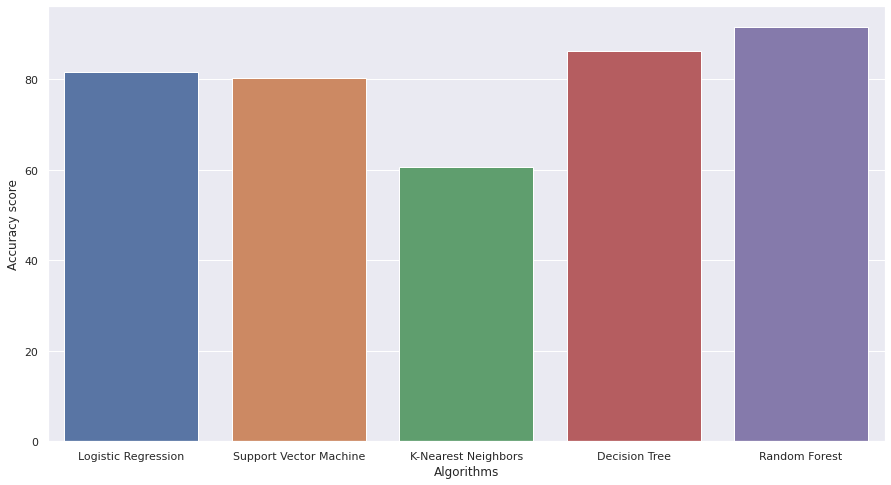

In [39]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## Evaluate the model's performance using accuracy, precision and recall in predicting a case of HeartDisease. (3)

In [41]:
y_test = pd.DataFrame(y_test)
rf_predict = pd.DataFrame(Y_pred_knn)


In [43]:
compare = pd.concat([rf_predict,y_test],axis=1)

In [44]:
compare.columns=["Predictions","Actual Values"]

In [45]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, Y_pred_rf) 

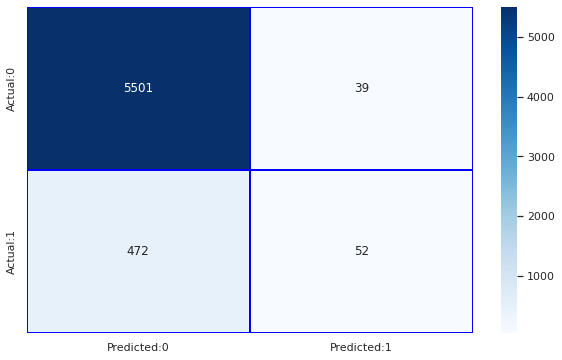

In [46]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues", linecolor="Blue", linewidths=1.5) 
plt.show() 

## Apply any steps (please explain the steps in the comments) you see fit to improve the initial model's output (15)

### Improving Model Performance
1. Adding more data
On this case study demonstration l am using 10% because of computation processing power to further improving the model performance would be using the whole 200000 data points.Having more data is always a good idea. It allows the “data to tell for itself,” instead of relying on assumptions and weak correlations. Presence of more data results in better and accurate models.

2. Treat missing and outlier values
The unwanted presence of outlier values in the training data often reduces the accuracy of a model or leads to a biased model. It leads to inaccurate predictions. This is because we don’t analyse the behavior and relationship with other variables correctly. So, it is important to treat outlier values well.

3. Feature Engineering 
This step helps to extract more information from existing data. New information is extracted in terms of new features. These features may have a higher ability to explain the variance in the training data. Thus, giving improved model accuracy.Feature transformation and feature creation . 

4. Feature Selection
finding out the best subset of attributes which better explains the relationship of independent variables with target variable.Domain Knowledge: Based on domain experience, we select feature(s) which may have higher impact on target variable.Statistical Parameters: We also consider the p-values, information values and other statistical metrics to select right features.PCA: It helps to represent training data into lower dimensional spaces, but still characterize the inherent relationships in the data. It is a type of dimensionality reduction technique. There are various methods to reduce the dimensions (features) of training data like factor analysis, low variance, higher correlation, backward/ forward feature selection and others.

5. Algorithm tuning/hyperparameter tuning
Machine learning algorithms are driven by parameters. These parameters majorly influence the outcome of learning process.The objective of parameter tuning is to find the optimum value for each parameter to improve the accuracy of the model. To tune these parameters, you must have a good understanding of these meaning and their individual impact on model. You can repeat this process with a number of well performing models.For example: In random forest, we have various parameters like max_features, number_trees, random_state, oob_score and others. Intuitive optimization of these parameter values will result in better and more accurate models.

6. Using Ensemble Methods
It is always a better idea to apply ensemble methods to improve the accuracy of your model. There are two good reasons for this: a ) They are generally more complex than traditional methods. b) The traditional methods give you a good base level from which you can improve and draw from to create your ensembles.



## Motivate if the model in its current form will be sufficient for its intended purpose or not. (10)
Given that the the dataset size is as being used in the demonstration 10% and a random forest model it is a more accurate way of predicting the heart dieasease in the employees . However :
The most important hyper-parameters of a Random Forest that can be tuned are:
1. The Nº of Decision Trees in the forest (in Scikit-learn this parameter is called n_estimators)
2. The criteria with which to split on each node (Gini or Entropy for a classification task, or the MSE or MAE for regression)
3. The maximum depth of the individual trees. The larger an individual tree, the more chance it has of overfitting the training data, however, as in Random Forests we have many individual trees, this is not such a big problem.
4. The minimum samples to split on at an internal node of the trees. Playing with this parameter and the previous one we could regularise the individual trees if needed.
5. Maximum number of leaf nodes. In Random Forest this is not so important, but in an individual Decision Tree it can greatly help reduce over-fitting as well and also help increase the explainability of the tree by reducing the possible number of paths to leaf nodes. Learn how to use Decision Trees to build explainable ML models here.
6. Number of random features to include at each node for splitting.

Furthermore , from the above parameters to be tune and cross validation . This model will be ready for production deployment it will be fit for purpose. 


## Briefly discuss the issue of overfitting and how to mitigate it (2)

Overfitting occurs when the model performs well on training data but generalizes poorly to unseen data.In this case study as l have done ,It is good practice to use Categorical Encoding for these so that the ML algorithms do not overfit to unique values. Making these into binary allows the ML algorithms to process the data in a less biased manner without losing any of the information.


## Suggest alternative solutions to solve the organisation's problem (1)

Can high-resolution photographs of blood cells help to predict heart attacks.

White blood cells and platelets can provide clues to a person’s risk of heart attack and stroke, according to researchers. But it isn’t known exactly what characteristics of these cells influence a person’s risk, and how.

High-resolution photographs of white blood cells may hold the answer. Researchers at the University of Cambridge are using algorithms to analyse blood sample images from 30,000 healthy people and measure certain properties of platelets and white blood cells, such as their shape and structure.

The team aims to identify the genes that affect these traits and see whether there is any overlap with parts of the genome known to influence CVD risk. This could help to identify drug targets for the prevention or treatment of heart attack and stroke.

### Reference 

https://www.bhf.org.uk/research-projects/2018/05/31/11/40/joint-funding-with-the-alan-turing-institute-towardslooking-for-cardiovascular-risk-factors-in-blood-smear-images